# Social network analysis of bottlenose dolphins

This notebook contains the computational part of the analysis of the bottlenose dolphin network. The visualizations were done with Gephi and can be found in the presentation

In [133]:
import networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns
import numpy as np
import random
from scipy.stats import bino
from networkx.algorithms import community

In [18]:
random.seed(2)

In [19]:
network = nx.read_gml('/Users/joel/Desktop/dolphins.gml')

In [20]:
g = nx.Graph(network)

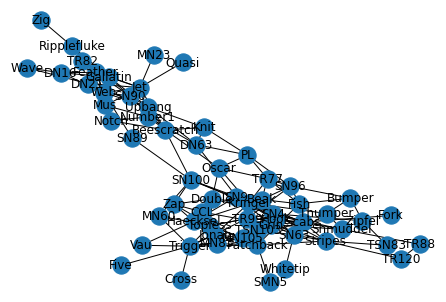

In [21]:
nx.draw(g, with_labels=True)
plt.show()

### Network characteristics

In [22]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 62\nNumber of edges: 159\nAverage degree:   5.1290'

In [23]:
# average degree

In [24]:
L = g.number_of_edges()
N = g.number_of_nodes()

In [25]:
d = (2 * L) / N
print("Average degree is:", d)

Average degree is: 5.129032258064516


In [26]:
# density

In [27]:
dens = (2 * L) / (N*(N-1))
print("The network density is:", dens)

The network density is: 0.08408249603384453


The dolphin network has 62 nodes and 159 links/edges. The average degree is 5.129 and the density of the network is 0.084.

In the next step we want to analyse if the network is to be considered as a scale free one or as an Endos - Renyi Network. Therefore we are checking the degree distribution.

In [28]:
#Degree distribution

In [29]:
#calculate for each node the degree
degrees = [g.degree(n) for n in g.nodes()]

In [30]:
#Returns the nodes of the network
n_nodes = g.nodes()

In [31]:
#Erdos-Renyi Random network
#Generate 100 networks with each of them N nodes and the propability to connect equal to the density of the original network
#Taking than the average over them

In [71]:
result_er = []
for i in range(0, 101):
    er = nx.erdos_renyi_graph(N, dens)
    hist_er = nx.degree_histogram(er)
    result_er.append(hist_er)

In [72]:
#change the result into a numpy array

In [73]:
result_er_np = np.asarray(result_er)

In [74]:
#checking where the array has the max len. We do this so we can merge the arrays later 
#together to just one array
max_len = max(len(item) for item in result_er)
max_len

15

In [75]:
for item in result_er:
    if len(item) < max_len:
        item.extend([0] * (max_len - len(item)))

In [76]:
result_er_np = np.asarray(result_er)

In [77]:
#Building a vector with the average frequency for each degree over the 100 networks.
avg_er = np.mean(result_er_np, axis = 0)

In [78]:
np.mean(avg_er)

4.133333333333332

We built 100 random networks where each of them have 62 nodes and are connected with the prop. 0.084 which is equal to the density of the dolphin network. The average degree of the Erdos - Renyi Network is 4.42. We build an ensemple of 100 networks since through the random process of building them isolated components can occure.

In [79]:
# For gehphi I exported the random Erdos - Renyi Network
nx.readwrite.gml.write_gml(er, '/Users/joel/Desktop/er.gml')

In [80]:
L_er = er.number_of_edges()
print("The Erdos - Renyi Network has", L_er, "links")

The Erdos - Renyi Network has 150 links


In [81]:
d_er = (2 * L_er) / N
print("Average degree of the Erdos - Renyi Network:", d_er)

Average degree of the Erdos - Renyi Network: 4.838709677419355


In [82]:
y_er = nx.degree_histogram(er)

In [83]:
#Creating a vector with 15 elements for the histogram. x is the number of connections of a node
x = np.arange(max_len)

In [84]:
# The histogram for the dolphin network
y_dolphin = nx.degree_histogram(g)

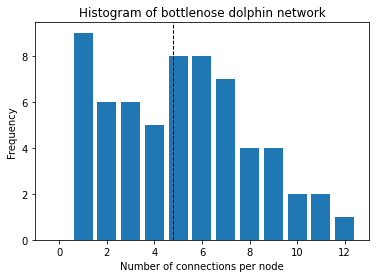

In [85]:
plt.bar(x = x[:13], height= y_dolphin)
plt.axvline(np.array(y_dolphin).mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of bottlenose dolphin network")
plt.xlabel('Number of connections per node')
plt.ylabel('Frequency')
plt.show()

In [360]:
avg_er.mean()

4.133333333333332

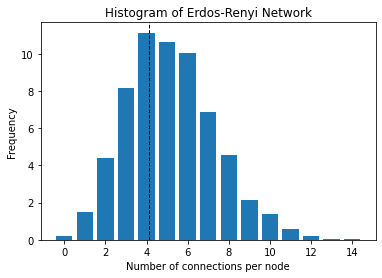

In [87]:
#Plot ER Network
plt.bar(x = x, height= avg_er)
plt.axvline(avg_er.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of Erdos-Renyi Network")
plt.xlabel('Number of connections per node')
plt.ylabel('Frequency')
plt.show()

The distribution of both networks is very different. While in the Erdos - Renyi Network the highest frequency of the nodes close to the average degree ist, the dolphin network computes other results. There we have a lot of nodes which just have one link.
Since the Erdos - Renyi Network we use is an ensemple over 100 Erdos - Renyi Networks we have in some networks isolated nodes and also networks with a high degree centrality. But if we take the average over them we can eliminate the random component of it and recieving more staple results. The histogram above shows the result over the ensemple. While in the random network the average degree lays in the bin with the highes frequency, in the dolphin network we see the existence of a lot of nodes with just one connection. Another difference is that the dolphin network has nodes with 11 or 12 connections which are based on the Erdos - Renyi network are very unlikly to exists.  

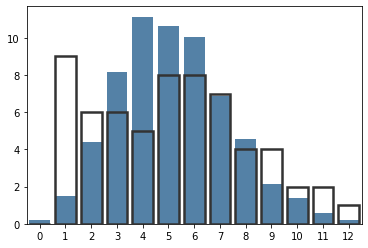

In [102]:
sns.barplot(x= x, y = avg_er, color = 'steelblue', label = 'Erdos - Renyi Network')
sns.barplot(x= x[:13], y = y_dolphin, linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor=".2", label = 'Dolphin Network')

In [190]:
log_x = np.log(x)

In [435]:
x_test = range(0,26)

In [197]:
log_dolphin = np.log(y_dolphin)
log_er = np.log(y_er)

In [227]:
mu = dens * (N-1)

In [436]:
poisson_er_dist = [poisson.pmf(i, mu, loc=0) for i in range(0,26)]

We know that the distribution of an Erdos - Renyi Network can be described through a poisson distribution.
Now we as well compute the probability function of the dolphin network.

In [109]:
#Probability function of the dolphin network
def scale_distribution(nodes, graph):
    h = nx.degree_histogram(graph)
    p_list = []
    for i in range(0, len(h)):
        p = h[i] / nodes 
        p_list.append(p)

    return p_list

In [206]:
#compute a binominal distribution for the Erdos - Renyi network
bi = binom.pmf(range(0, 16), N - 1, dens)

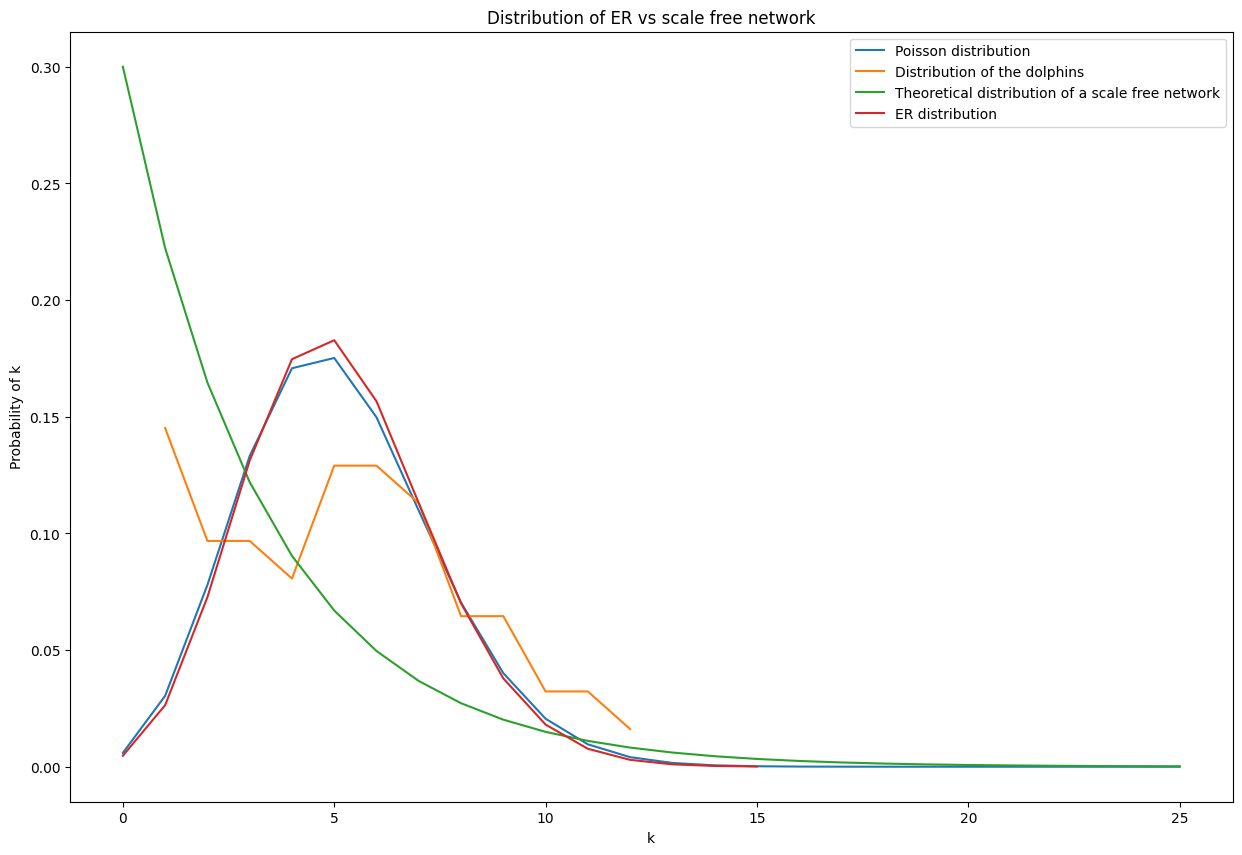

In [213]:
#range of the distribution
x_range = range(0,26)

# poisson distribution
mu = dens * (N-1)
poisson_er_dist = [poisson.pmf(i, mu, loc=0) for i in range(0,26)]

#Distribution of the dolphin network
u = scale_distribution(62, g)

#theoretical distribution of the dolphin network
p_theoretical = [(np.exp(-i * 0.3) * 0.3) for i in range(0, 26)]

plt.plot(x_range, poisson_er_dist, label ='Poisson distribution')
plt.plot(x_range[1:13], u[1:13], label = 'Distribution of the dolphins')
plt.plot(x_range[0:41], p_theoretical[0:41], label ='Theoretical distribution of a scale free network')
plt.plot(x_range[0:16], bi, label ='ER distribution')
plt.legend()
plt.title("Distribution of ER vs scale free network")
plt.xlabel('k')
plt.ylabel('Probability of k')
plt.show()

The probability that a node is connected goes down with an increasing node degree in the Erdos - Renyi Network and the dolphin network. But the difference is that the dolphin network has a high prob. for nodes with a small degree, while the Erdos - Renyi Network has the largest on the average degree. The dolphin network is to smalle to plot the power law. But we find indications that it is following the distribution of a scale free network. The green line shows this distribution. Typically is the exponential degree which leads in a loglog scale to a superlinear decrease. Since the distribution of the dolphin network seems to follow the distribution of a scale free network we assume that it is a scale free one.

In [395]:
def scale_distribution(nodes, graph):
    h = nx.degree_histogram(graph)
    p_list = []
    for i in range(0, len(h)):
        p = h[i] / nodes 
        p_list.append(p)

    return p_list

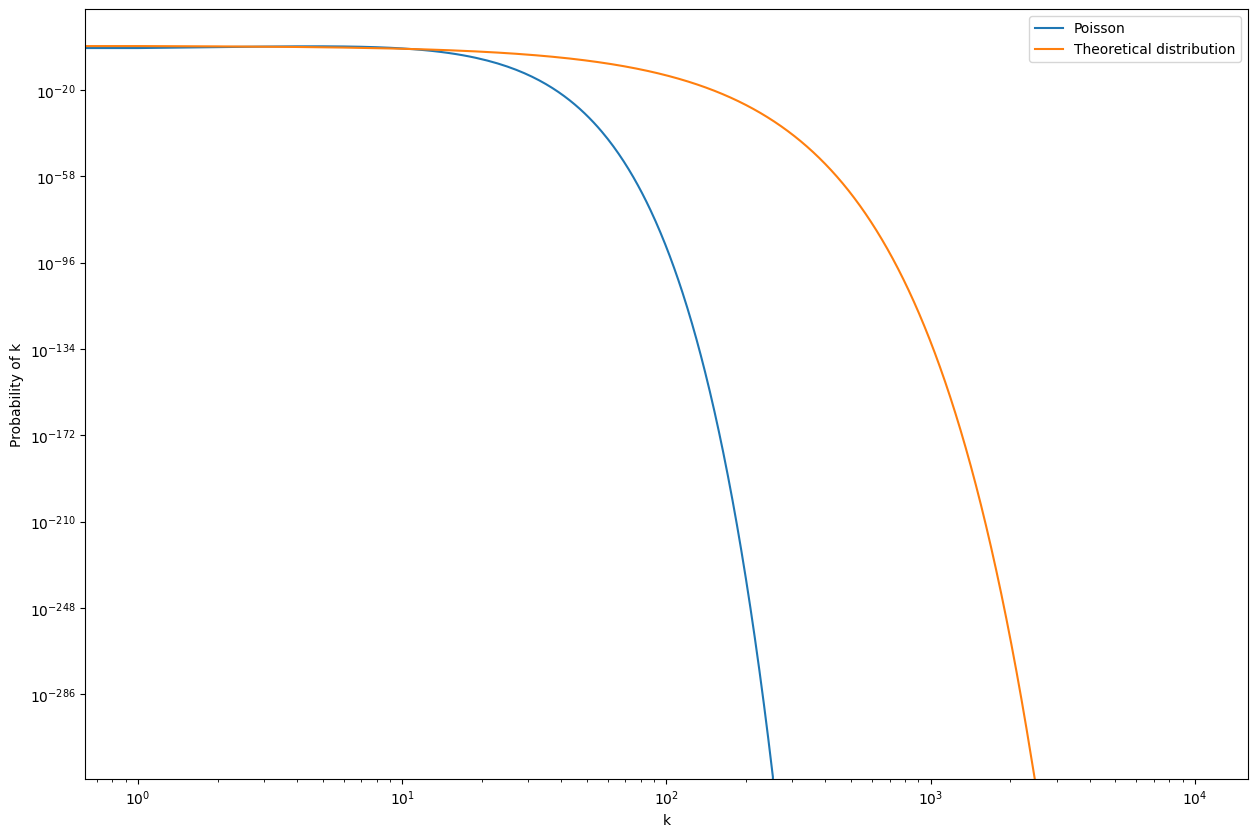

In [219]:
#If we would plot the power law 
x_range_log = range(0, 10001)

k = dens * (N - 1)

poisson_er_dist_log = [poisson.pmf(i, k, loc=0) for i in range(0,10001)]
p_theoretical_log = [(np.exp(-i * 0.3) * 0.3) for i in range(0, 10001)]

plt.loglog(x_range_log, poisson_er_dist_log, label = 'Poisson')
plt.loglog(x_range_log, p_theoretical_log, label = 'Theoretical distribution')
plt.legend()
plt.xlabel('k')
plt.ylabel('Probability of k')
plt.show()

If we plot the poisson distribution and our theoretical distribution in a loglog scale we see that in scale free networks we have nodes with a large degree (orange line), which are not present in a poisson distribution. The main problem of the dolphin network is, that it is to small to apply the power law here since we have just 62 nodes with a maximum degree of 12.

In [400]:
u = scale_distribution(62, g)

In [600]:
avg_er[5]

11.475247524752476

## Identifying Hubs and other important nodes

Before we assumed that our original network has scale free properties. Therefore we should be able to identify hubs in our network. Hubs are nodes which have in respect with the rest of the network more links than other nodes

In [114]:
# max degree in dolphin vs endos - renyi network
degree = dict(nx.degree(network))
keys, values = degree.keys(), degree.values()
arg = np.argmax(list(values))

arg_er = np.argmax(avg_er)

print("Real Dolphin Network")
print("Degree:", list(values)[arg])
print("Dolphin name:", list(keys)[arg])
print("-------------------------------")
print("Erdos - Renyi Network")
print("Degree:", np.round(avg_er[arg_er]))

Real Dolphin Network
Degree: 12
Dolphin name: Grin
-------------------------------
Erdos - Renyi Network
Degree: 11.0


In [246]:
#Connectivity

In [121]:
#returns the degree for each node and normalize it based on the maximum degree centrality
def centrality(network):
    degree = dict(nx.degree(network))
    keys, values = degree.keys(), degree.values()
    l_values = list(values)
    l_keys = list(keys)
    max_degree = max(values)
    centrality_degree = {}

    for i in range(0, len(degree)):
        c = l_values[i] / max_degree
        centrality_degree[l_keys[i]] = c

    return centrality_degree

In [115]:
#finding n max degrees
def n_max(n, centrality_nodes):
    
    u = list(sorted(centrality_nodes.items(), key=lambda item: item[1], reverse= True))

    n_max_list = []

    for i in range(0, n):
        n_max_list.append(u[i])
    
    return n_max_list

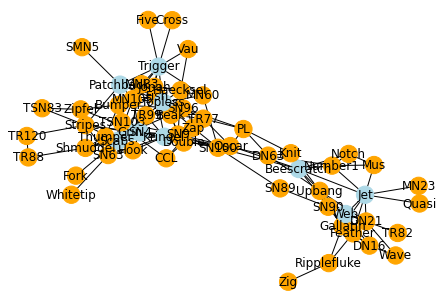

In [119]:
central = centrality(g)
n_max_central = n_max(10, central)

#just keeping n elements name
l_list = []
for i in range(0, len(n_max_central)):
    l = n_max_central[i][0]
    l_list.append(l)
#list of the nodes
list_nodes = list(g.nodes)
color_map = []

for i in range(0, len(list_nodes)):

    if list_nodes[i] in l_list:
        color_map.append('lightblue')
    else: 
        color_map.append('orange')      
nx.draw(g, node_color=color_map, with_labels=True)
plt.show()

In [120]:
n_max_central

[('Grin', 1.0),
 ('SN4', 0.9166666666666666),
 ('Topless', 0.9166666666666666),
 ('Scabs', 0.8333333333333334),
 ('Trigger', 0.8333333333333334),
 ('Jet', 0.75),
 ('Kringel', 0.75),
 ('Patchback', 0.75),
 ('Web', 0.75),
 ('Beescratch', 0.6666666666666666)]

In [234]:
max_degree_list = n_max(10, dict(nx.degree(network)))
max_degree_list

[('Grin', 12),
 ('SN4', 11),
 ('Topless', 11),
 ('Scabs', 10),
 ('Trigger', 10),
 ('Jet', 9),
 ('Kringel', 9),
 ('Patchback', 9),
 ('Web', 9),
 ('Beescratch', 8)]

In [127]:
((12 + 2* 11 + 2*10 + 4* 9+ 8) / L) , 10 / N

(0.6163522012578616, 0.16129032258064516)

The graph shows the 10th highest degrees in the netwok. The list above shows the name of the dolphins. The centrality degree is normalized. Under it there is also the same list with the number of links per node. Again for the same 10 dolphins. These 10 dolphins represent 16% of the nodes in the network, but are connected to 61% of the links 

### Eigenvector centrality

In [361]:
eigen = nx.eigenvector_centrality(g)

In [363]:
n_max(10, eigen)

[('Grin', 0.3157810764804675),
 ('SN4', 0.30056092847049554),
 ('Topless', 0.2850031047324042),
 ('Scabs', 0.2810970171605868),
 ('TR99', 0.217690513310815),
 ('Patchback', 0.2117610946447421),
 ('Trigger', 0.210680208920898),
 ('Hook', 0.20799316926734226),
 ('SN9', 0.20787263130203704),
 ('MN105', 0.2073496172237698)]

### PageRank
An alternative centrality measure would be the PageRank algorithm. The basic idea is that if a network is directed and has loops or isolated component the algorithm will not stuck in them, instead through a random teleport it has the ability to jump to other parts of the network and leave in this way loops and isolated components. In our approach to compute the page rank makes not a lot of sense. First our network is undirected and has no loops and second there are no isolated components.

In [194]:
pagerank = nx.pagerank(g)

In [196]:
n_max(10, pagerank)

[('Grin', 0.032137029718865714),
 ('Jet', 0.0317411226125807),
 ('Trigger', 0.031292342498045814),
 ('Web', 0.030108941362489348),
 ('SN4', 0.02986895450279476),
 ('Topless', 0.02950713720344268),
 ('Scabs', 0.028416738215896527),
 ('Patchback', 0.026452435542402352),
 ('Gallatin', 0.02616992597905726),
 ('Beescratch', 0.024657779163893466)]

### Betweennes centrality

Not just nodes with a high degree are important, also some nodes are critical for the network since they controll the information flow through it. Therefore we are looking for the betweennes centrality.

In [129]:
betweenesCentrality = nx.betweenness_centrality(g)

In [130]:
z = list(sorted(betweenesCentrality.items(), key=lambda item: item[1], reverse= True))

In [131]:
z[0:5]

[('SN100', 0.24823719602893804),
 ('Beescratch', 0.21332443553281097),
 ('SN9', 0.1431495183426175),
 ('SN4', 0.13856978865859435),
 ('DN63', 0.11823861926938342)]

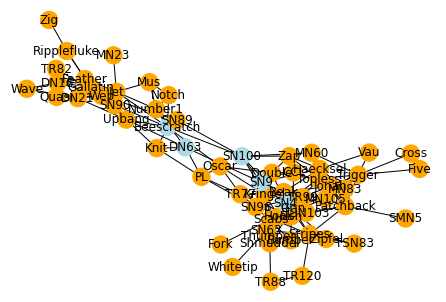

In [132]:
#Taking the 5th highest betweenes centrality points
l_list = []
for i in range(0, 5):
    l = z[i][0]
    l_list.append(l)
#list of the nodes
list_nodes = list(g.nodes)
color_map = []

for i in range(0, len(list_nodes)):

    if list_nodes[i] in l_list:
        color_map.append('lightblue')
    else: 
        color_map.append('orange')      
nx.draw(g, node_color=color_map, with_labels=True)
plt.show()

The graph above shows us the betweennes centrality of the network. As expected we find nodes with a higher betweennes centrality more between the left and the right side of the network. The important thing of these nodes is that they have an information advantage over other dolphins since information are transmitted over them, on the other side they can decide if they let information flow through the network or not. Information in this case can be for example the knwoledge about competitors or fishing / hunting places

## Average and Global clustering coefficient

In [198]:
#Average clusterring coefficient of the dolphin network
avg_cluster = nx.average_clustering(g)
avg_cluster

0.2589582460550202

In [200]:
#Average clusterring coefficient of an erdos - renyi network (Just for comparison)
erdos_renyi = nx.erdos_renyi_graph(N, dens)
avg_cluster_er = nx.average_clustering(erdos_renyi)
avg_cluster_er

0.04421402969790068

We see that the average cluster coefficient in the dolphin network is much higher than in the erdos - renyi network. A higher average cluster coefficient emphasize that it is more likly that the friend of my friend is as well my friend. In the context of the dolphin network, that if dolphin "a" has a link to "b" and "b" to "c" than also it is likely that "a" has a link to "c".

In [201]:
# Transitivity
t_dolphin = nx.transitivity(g)
t_erdos_renyi = nx.transitivity(erdos_renyi)
print("Transitivity of the dolphin network:", t_dolphin)
print("Transitivity of an Erdos - Renyi Network:", t_erdos_renyi)

Transitivity of the dolphin network: 0.3087757313109426
Transitivity of an Erdos - Renyi Network: 0.05054151624548736


A similar result we have for the transitivity. The dolphin network has a significant higher transitivity than an Erdos - Renyi Network. A high transitivity means that a network tends to be fully connected.

In [345]:
local_cluster = nx.clustering(g, nodes= 'Grin')
local_cluster

0.25757575757575757

In [346]:
local_cluster = nx.clustering(g)
sorted(local_cluster.items(), key=lambda item: item[1], reverse= True)

[('Mus', 0.6666666666666666),
 ('Notch', 0.6666666666666666),
 ('Hook', 0.6),
 ('SN90', 0.6),
 ('DN21', 0.5333333333333333),
 ('MN105', 0.5333333333333333),
 ('MN83', 0.5333333333333333),
 ('Feather', 0.5238095238095238),
 ('Jonah', 0.5238095238095238),
 ('DN16', 0.5),
 ('Gallatin', 0.5),
 ('Knit', 0.5),
 ('Fish', 0.4),
 ('Number1', 0.4),
 ('TR77', 0.4),
 ('Upbang', 0.38095238095238093),
 ('Web', 0.3611111111111111),
 ('Beak', 0.3333333333333333),
 ('CCL', 0.3333333333333333),
 ('MN60', 0.3333333333333333),
 ('Ripplefluke', 0.3333333333333333),
 ('Scabs', 0.3333333333333333),
 ('SN96', 0.3333333333333333),
 ('TSN103', 0.3333333333333333),
 ('Topless', 0.3090909090909091),
 ('Oscar', 0.3),
 ('PL', 0.3),
 ('Shmuddel', 0.3),
 ('Zap', 0.3),
 ('SN63', 0.2857142857142857),
 ('Double', 0.26666666666666666),
 ('Grin', 0.25757575757575757),
 ('Patchback', 0.25),
 ('SN9', 0.25),
 ('Trigger', 0.24444444444444444),
 ('Haecksel', 0.23809523809523808),
 ('Stripes', 0.23809523809523808),
 ('TR99', 0.

In [349]:
triangle = nx.triangles(g, nodes='Mus')
triangle

2

## Communities
Many animals forming communities. We find communities in wolf packs, ect. Communities have the advantage that they offer protection against predators, a place for finding a sexual partner or as well they offer the ability to apply hunting techniques which just work in a group. From the visual impression we can think about to divide our network in at least two communities.

For finding communities we apply the greddy algorithm. The basic idea is that we start with n communites, where n is equal to the number of nodes in the network. In each step we merge two communities together which have a maximum $\Delta$ modularity. The greedy algorithm converge when there is just one singel community. Then we take the value where the modularity was at the maximum and we knwo the number of communities

In [134]:
#Using greedy algorithm to find communities
greedy = community.greedy_modularity_communities(g)

In [143]:
#showing size of communities
c = list(greedy)
for i in range(0, len(c)):
    print(len(c[i]))

23
22
15
2


In [191]:
pos_dolphin = nx.spring_layout(g)
#pos_dolphin = nx.circular_layout(g)

In [139]:
#Source: https://orbifold.net/default/community-detection-using-networkx/
#Just for coloring in networkx
    
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

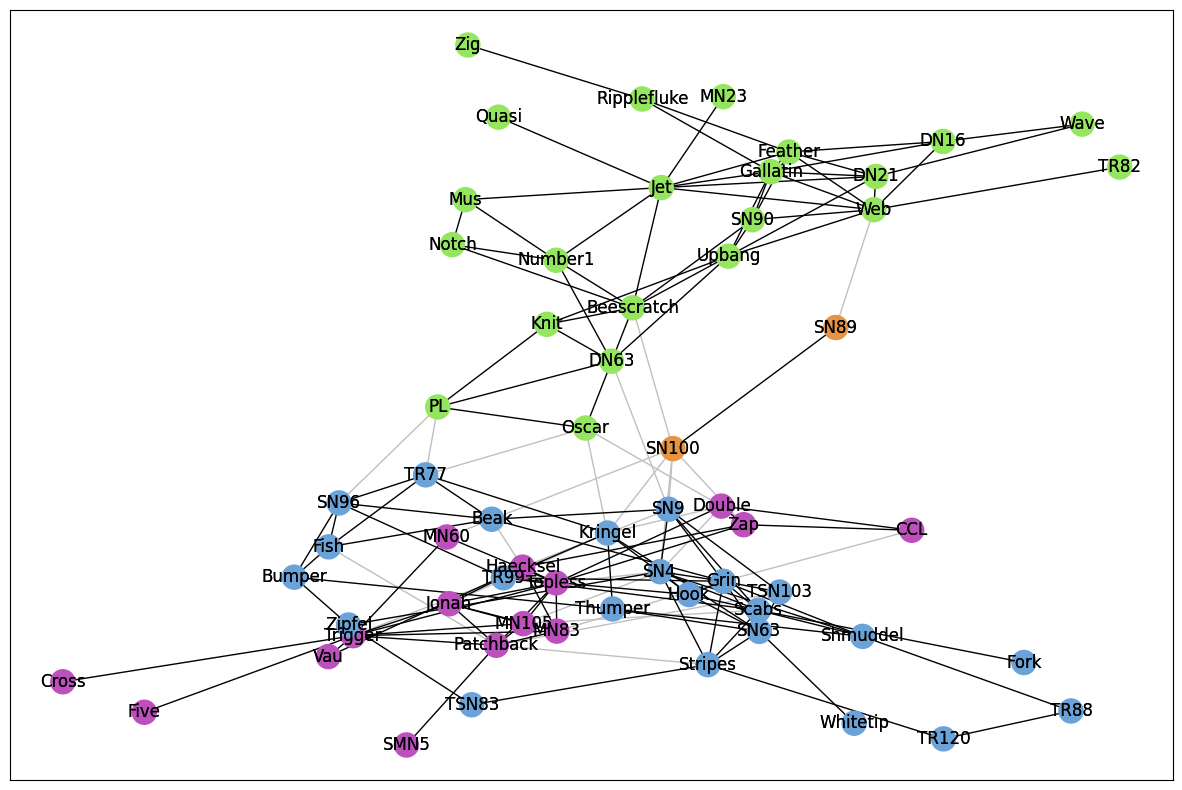

In [193]:
# Set node and edge communities
set_node_community(g, greedy)
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]
   
   
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
        g,
        pos=pos_dolphin,
        node_size=0,
        edgelist=external,
        edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
        g,
        pos=pos_dolphin,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color)

#Export for gephi
nx.write_graphml(g, '/Users/joel/Desktop/colored_nodes.graphml' )

With the greedy algorithm we could identify four communities. The size of the communities is between 23 and 2 dolphins.

In [310]:
nodes_with_communities = list(nx.get_node_attributes(g, 'community'))

In [356]:
attribute_list = []
attribute_list_keys = []

five_max_degree = n_max(10, dict(nx.degree(network)))
name = [five_max_degree[i][0] for i in range(0, len(five_max_degree))]
for i in range(0, len(nodes_with_communities)):
    name_from_com = nodes_with_communities[i]
    if name_from_com in name:
        attribute_list_keys.append(name_from_com)
        attribute_list.append(1)
    else:
        attribute_list_keys.append(name_from_com)
        attribute_list.append(0)

In [357]:
zipped_attributes = dict(zip(attribute_list_keys, attribute_list))

In [358]:
nx.set_node_attributes(g, zipped_attributes, "hubs_in_comm")

In [359]:
nx.write_graphml(g, '/Users/joel/Desktop/hubs_in_g.graphml' )

In [355]:
name

['Grin', 'SN4', 'Topless', 'Scabs', 'Trigger']

## Similarities of nodes

In [228]:
jaccard = nx.jaccard_coefficient(g)

In [229]:
jaccard_list = list(jaccard)

In [238]:
max_degree_list_name = [max_degree_list[i][0] for i in range(0, len(max_degree_list))]

In [259]:
for i in range(0, len(max_degree_list_name)):
    actual_dolphin = max_degree_list_name[i]
    for j in range(0, len(jaccard_list)):
        opponent = jaccard_list[j][0]
        if (actual_dolphin == opponent) and jaccard_list[j][2] > 0:
            #sim.append(actual_dolphin)
            print(actual_dolphin, jaccard_list[j][1],  jaccard_list[j][2])

Grin SN96 0.125
Grin TR77 0.058823529411764705
SN4 SN89 0.08333333333333333
Topless Grin 0.15
Topless SN96 0.0625
Topless SMN5 0.09090909090909091
Topless Stripes 0.125
Scabs Trigger 0.1111111111111111
Scabs TSN83 0.09090909090909091
Scabs TSN103 0.2727272727272727
Scabs CCL 0.08333333333333333
Scabs Patchback 0.11764705882352941
Scabs SN100 0.13333333333333333
Scabs Zipfel 0.08333333333333333
Scabs TR88 0.09090909090909091
Scabs Haecksel 0.0625
Scabs Thumper 0.16666666666666666
Scabs TR120 0.09090909090909091
Scabs Beak 0.14285714285714285
Scabs Kringel 0.1875
Scabs Whitetip 0.1
Scabs Jonah 0.0625
Scabs MN83 0.06666666666666667
Scabs Double 0.06666666666666667
Scabs Topless 0.16666666666666666
Scabs SN96 0.06666666666666667
Trigger TSN103 0.07692307692307693
Trigger SN100 0.0625
Trigger Zap 0.07142857142857142
Trigger Haecksel 0.3076923076923077
Trigger Kringel 0.11764705882352941
Trigger Fish 0.07142857142857142
Trigger Hook 0.06666666666666667
Trigger Double 0.06666666666666667
Trig

We computed the jaccard similarity for five dolphins. Grin and SN4 which having the highes degree centrality do not have a lot of other similar nodes, while Beesratch have significatly more, but a lower degree centrality. Unfortunately we cannot gain more information out of here, since the network dataset does not provide us them. A hypothesis could be, that dolphins with the same sex have a higher similarity, but as already mentioned we cannot analyse this. 